In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

##### Loading the train and test data

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Making the train test split

In [5]:
y_train = np.array(train_df.loc[:,'label'])
X_train = np.array(train_df.loc[:,train_df.columns!='label'])
y_train.shape

(60000,)

In [6]:
y_test = np.array(test_df.loc[:,'label'])
X_test = np.array(test_df.loc[:,test_df.columns!='label'])
y_test.shape

(10000,)

In [7]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [8]:
test_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


##### As we can see that pixel value is between 0 adn 255 so we divide it by 255 to bring it between 0 and 1

In [10]:
X_train = X_train.astype('float32')
X_train = X_train / 255.0

In [11]:
X_test = X_test.astype('float32')
X_test = X_test / 255.0

In [12]:
X_train.shape[1]

784

##### We are visualizing few data images 

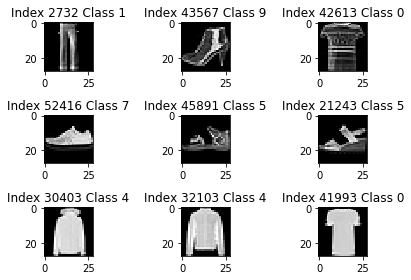

In [13]:
np.random.seed(0);
indices = list(np.random.randint(60000,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()

In [19]:
class TwolayerNeuralNetwork(object):
    
    def __init__(self, input_size, hidden_size, output_size, std=1e-4): 
        #we use std to ensure weights are initialized to small values
        
        #the shape of weights will be (n[l],n[l-1])
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)   
        self.params['b1'] = np.zeros((1, hidden_size))    
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)   
        self.params['b2'] = np.zeros((1, output_size))
        
    def loss(self, X, y=None, reg=0.0):
        
        #getting variables from params
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        
        #computing the forwad prop
        scores = None
        h1 = ReLU(np.dot(X, W1) + b1)      
        out = np.dot(h1, W2) + b2          
        scores = out
        if y is None:   
            return scores
        
        #computing the loss
        scores_max = np.max(scores, axis=1, keepdims=True)
        exp_scores = np.exp(scores - scores_max)              
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)   
        correct_logprobs = -np.log(probs[range(N), y])        
        data_loss = np.sum(correct_logprobs) / N
        reg_loss = 0.5 * reg * np.sum(W1*W1) + 0.5 * reg * np.sum(W2*W2)
        loss = data_loss + reg_loss
        
        # Backward pass: compute gradients
        grads = {}  #to hold all the gradients
        dscores = probs                                 
        dscores[range(N), y] -= 1
        dscores /= N
        
        dW2 = np.dot(h1.T, dscores)                  
        db2 = np.sum(dscores, axis=0, keepdims=True)
        dh1 = np.dot(dscores, W2.T)                     
        dh1[h1 <= 0] = 0
        dW1 = np.dot(X.T, dh1)                          
        db1 = np.sum(dh1, axis=0, keepdims=True)
        dW2 += reg * W2
        dW1 += reg * W1
        
        #assigning the weights and bias for each layer
        grads['W1'] = dW1
        grads['b1'] = db1
        grads['W2'] = dW2
        grads['b2'] = db2

        return loss, grads
    
    def train(self, X, y, learning_rate=1e-3, 
                reg=1e-5, mu=0.9, num_epochs=10, 
                batch_size=200, verbose=False): 
        
        #using mini batch for training
        num_train = X.shape[0]
        iterations_per_epoch = max(int(num_train / batch_size), 1)
        
        v_W2, v_b2 = 0.0, 0.0
        v_W1, v_b1 = 0.0, 0.0
        loss_history = []  #list to store the loss
        train_acc_history = [] #list to store the train accuracy
        
        for it in range(1, num_epochs * iterations_per_epoch + 1):   
            X_batch = None   
            y_batch = None 
            
            # Create a random minibatch of training data and labels
            sample_index = np.random.choice(num_train, batch_size, replace=True)   
            X_batch = X[sample_index, :]          
            y_batch = y[sample_index]             
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg) 
            loss_history.append(loss)
            
            # Use the gradients to update the parameters of the network
            v_W2 = mu * v_W2 - learning_rate * grads['W2']    
            self.params['W2'] += v_W2 
            v_b2 = mu * v_b2 - learning_rate * grads['b2']    
            self.params['b2'] += v_b2  
            
            v_W1 = mu * v_W1 - learning_rate * grads['W1']    
            self.params['W1'] += v_W1   
            v_b1 = mu * v_b1 - learning_rate * grads['b1']  
            self.params['b1'] += v_b1
            
            if verbose and it % iterations_per_epoch == 0:    
            # Every epoch, check train and val accuracy and decay learning rate.
                epoch = it / iterations_per_epoch    
                train_acc = (self.predict(X_batch) == y_batch).mean()    
                train_acc_history.append(train_acc)    
                print("epoch %d / %d: loss %f, train_acc: %f" % 
                                    (epoch, num_epochs, loss, train_acc))
                if train_acc > 0.90:
                    break
                

        return {   
            'loss_history': loss_history,   
            'train_acc_history': train_acc_history,   
        }
    
    def predict(self, X):    

        y_pred = None    
        h1 = ReLU(np.dot(X, self.params['W1']) + self.params['b1'])    
        scores = np.dot(h1, self.params['W2']) + self.params['b2']    
        y_pred = np.argmax(scores, axis=1)    

        return y_pred
    
def ReLU(x):    
    return np.maximum(0, x)

In [22]:
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 10
net = TwolayerNeuralNetwork(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train,
            num_epochs=20, batch_size=32,
            learning_rate= 3*1e-3, 
            reg=1e-5, verbose=True)

# Predict on the test set
test_acc = (net.predict(X_test) == y_test).mean()
print("Test Accuracy", test_acc)

epoch 1 / 20: loss 0.794104, train_acc: 0.718750
epoch 2 / 20: loss 0.634240, train_acc: 0.781250
epoch 3 / 20: loss 0.740710, train_acc: 0.687500
epoch 4 / 20: loss 0.336571, train_acc: 0.875000
epoch 5 / 20: loss 0.484305, train_acc: 0.843750
epoch 6 / 20: loss 0.242948, train_acc: 0.937500
Test Accuracy 0.8595


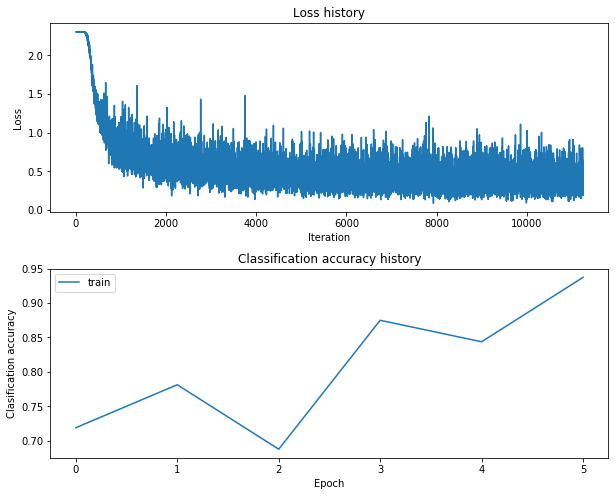

In [23]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.subplots_adjust(wspace =0, hspace =0.3)


# Plot the loss function and train accuracy

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()
